In [1]:
import pandas as pd
import numpy as np

# Import Data

In [2]:
# KAGGLE DATA
mm_results = pd.read_csv('MNCAATourneyDetailedResults.csv')
mm_seeds = pd.read_csv('MNCAATourneySeeds.csv')
teams = pd.read_csv('MTeams.csv')
team_spellings = pd.read_csv('MTeamSpellings.csv', encoding='latin1')
team_spellings['TeamID'] = team_spellings['TeamID'].astype(str)

In [3]:
# OUTSIDE DATA
cbb = pd.read_csv('cbb.csv')
cbb25 = pd.read_csv('cbb25.csv').drop(columns=['3PR', '3PRD', 'RK']).rename(columns={'Team':'TEAM'})
cbb = pd.concat([cbb, cbb25])
cbb = cbb[cbb['YEAR'] >= 2017]
cbb['YEAR'] = cbb['YEAR'].astype(int).astype(str)

kenpom = pd.read_csv('KenPom Barttorvik.csv')
kenpom = kenpom[kenpom['YEAR'] >= 2017]
kenpom['YEAR'] = kenpom['YEAR'].astype(int).astype(str)

resumes = pd.read_csv('Resumes.csv')
resumes = resumes[resumes['YEAR'] >= 2017]
resumes['YEAR'] = resumes['YEAR'].astype(int).astype(str)

kpi17 = pd.read_excel('KPI-Rankings_2017.xlsx')
kpi18 = pd.read_excel('KPI-Rankings_2018.xlsx')
kpi19 = pd.read_excel('KPI-Rankings_2019.xlsx')
kpi21 = pd.read_excel('KPI-Rankings_2021.xlsx')
kpi22 = pd.read_excel('KPI-Rankings_2022.xlsx')
kpi23 = pd.read_excel('KPI-Rankings_2023.xlsx')
kpi24 = pd.read_excel('KPI-Rankings_2024.xlsx')
kpi25 = pd.read_excel('KPI-Rankings_2025.xlsx')

In [4]:
# combine KPI data frames
kpi17 = kpi17[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi17['Year'] = '2017'
kpi18 = kpi18[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi18['Year'] = '2018'
kpi19 = kpi19[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi19['Year'] = '2019'
kpi21 = kpi21[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi21['Year'] = '2021'
kpi22 = kpi22[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi22['Year'] = '2022'
kpi23 = kpi23[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi23['Year'] = '2023'
kpi24 = kpi24[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi24['Year'] = '2024'
kpi25 = kpi25[['KPI', 'Team', 'KPI #', 'SOS', 'SOS Rk']]
kpi25['Year'] = '2025'

kpi = pd.concat([kpi17, kpi18, kpi19, kpi21, kpi22, kpi23, kpi24, kpi25], ignore_index=True)

In [5]:
# DATA SOURCES:

# Main Kaggle: https://www.kaggle.com/competitions/march-machine-learning-mania-2025/data
# CBB rankings only go back to 2013 tournament: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset
# KPI rankings only go back to 2017 tournament: https://faktorsports.com/
# KenPom Rankings: https://www.kaggle.com/datasets/nishaanamin/march-madness-data?select=KenPom+Barttorvik.csv
# Resumes: https://www.kaggle.com/datasets/nishaanamin/march-madness-data?select=Resumes.csv

# NET rankings only go back to 2021 tournament: https://stats.ncaa.org/selection_rankings/nitty_gritties
# 538 shut down for 2024, so can't use power ratings

# Merge Tournament Results Data

In [6]:
mm_results.drop(columns=['DayNum','WScore','LScore'])

,Season,WTeamID,LTeamID,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,1421,1411,N,1,32,69,11,29,17,...,31,14,31,17,28,16,15,5,0,22
1,2003,1112,1436,N,0,31,66,7,23,11,...,16,7,7,8,26,12,17,10,3,15
2,2003,1113,1272,N,0,31,59,6,14,16,...,28,14,21,20,22,11,12,2,5,18
3,2003,1141,1166,N,0,29,53,3,7,18,...,17,12,17,14,17,20,21,6,6,21
4,2003,1143,1301,N,1,27,64,7,20,15,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1301,1181,N,0,28,60,3,13,17,...,20,21,26,10,27,11,9,4,5,23
1378,2024,1345,1397,N,0,24,53,3,15,21,...,26,7,11,6,17,17,6,8,4,25
1379,2024,1163,1104,N,0,31,62,10,25,14,...,23,9,11,7,21,9,7,2,5,15
1380,2024,1345,1301,N,0,22,55,10,25,9,...,19,3,4,6,22,10,11,8,3,13


In [7]:
# isolate relevant columns
mm_results = mm_results[['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore']]

# merge team names to match ID's
mm_results = mm_results.merge(teams, left_on='WTeamID', right_on='TeamID', how='left', suffixes=('', '_W'))
mm_results = mm_results.merge(teams, left_on='LTeamID', right_on='TeamID', how='left', suffixes=('', '_L'))

# isolate and rename relevant columns 
mm_results.drop(['TeamID', 'TeamID_L'], axis=1, inplace=True)
mm_results.rename(columns={'TeamName': 'WTeamName', 'TeamName_L': 'LTeamName'}, inplace=True)
mm_results.drop(['FirstD1Season', 'LastD1Season', 'FirstD1Season_L', 'LastD1Season_L'], axis=1, inplace=True)

# filter for relevant matches
year_mask = (mm_results['Season'] >= 2017)
round_mask = (mm_results['DayNum'] >= 136)
mm_results = mm_results[year_mask & round_mask]

### Adjust Mistakes in Round Column

In [8]:
def get_round(day_num, season):
    # 2021 tournament had no play-in games
    if season == 2021:
        if day_num in [136]:
            return 'Play-in games'
        if day_num in [137,138]:
            return 'Round 1'
        elif day_num in [139,140]:
            return 'Round 2'
        elif day_num in [145,146]:
            return 'Round 3 (Sweet Sixteen)'
        elif day_num in [147,148]:
            return 'Round 4 (Elite Eight)'
        elif day_num == 152:
            return 'Round 5 (Final Four)'
        elif day_num == 154:
            return 'Round 6 (National Final)'
        else:
            return 'Unknown'
    
    # all other seasons
    else:
        if day_num in [134,135]:
            return 'Play-in games'
        elif day_num in [136,137]:
            return 'Round 1'
        elif day_num in [138,139]:
            return 'Round 2'
        elif day_num in [143,144]:
            return 'Round 3 (Sweet Sixteen)'
        elif day_num in [145,146]:
            return 'Round 4 (Elite Eight)'
        elif day_num == 152:
            return 'Round 5 (Final Four)'
        elif day_num == 154:
            return 'Round 6 (National Final)'
        else:
            return 'Unknown'


mm_results['Round'] = mm_results.apply(lambda x: get_round(x['DayNum'], x['Season']), axis=1)

In [9]:
# remove region from seeds data
mm_seeds['Seed'] = mm_seeds['Seed'].apply(lambda x: int(x[1:3]))

In [10]:
# merge tournament seeds onto teams
mm_results = mm_results.merge(mm_seeds, left_on=['Season','WTeamID'], right_on=['Season','TeamID'], how='left', suffixes=('', '_W'))
mm_results = mm_results.merge(mm_seeds, left_on=['Season','LTeamID'], right_on=['Season','TeamID'], how='left', suffixes=('', '_L'))

# isolate and rename relevant columns 
mm_results.drop(['TeamID', 'TeamID_L'], axis=1, inplace=True)
mm_results.rename(columns={'Seed': 'WSeed', 'Seed_L': 'LSeed'}, inplace=True)

### Name First Alphabetical Team 'ATeam' and Other Team 'BTeam' to Randomize Order for Modeling

In [11]:
def rename_teams(row):
    sorted_names = sorted([row['WTeamName'], row['LTeamName']])
    return pd.Series({'ATeamName': sorted_names[0], 'BTeamName': sorted_names[1]})

new_columns = mm_results.apply(rename_teams, axis=1)
mm_results = pd.concat([mm_results, new_columns], axis=1)

In [12]:
def match_team_info(row):
    if row['WTeamName'] == row['ATeamName']:
        return pd.Series({'ATeamID': row['WTeamID'], 'BTeamID': row['LTeamID'],
                          'AScore': row['WScore'], 'BScore': row['LScore'],
                          'ASeed': row['WSeed'], 'BSeed': row['LSeed']})
    elif row['WTeamName'] == row['BTeamName']:
        return pd.Series({'BTeamID': row['WTeamID'], 'ATeamID': row['LTeamID'],
                          'BScore': row['WScore'], 'AScore': row['LScore'],
                          'BSeed': row['WSeed'], 'ASeed': row['LSeed']})

new_columns = mm_results.apply(match_team_info, axis=1)
mm_results = pd.concat([mm_results, new_columns], axis=1)
mm_results.drop(['WTeamName','LTeamName','WTeamID','LTeamID','WScore','LScore','WSeed','LSeed'], axis=1, inplace=True)

### Double Check Rounds Were Updated Properly

In [13]:
# make sure each round has appropriate number of matches
# VCU forfeited in the first rounf of 2021, so this number should be 31
mm_results.drop(columns=['DayNum']).groupby(['Season','Round']).size().unstack('Season')

Season,2017,2018,2019,2021,2022,2023,2024
Round,,,,,,,
Play-in games,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Round 1,32.0,32.0,32.0,31.0,32.0,32.0,32.0
Round 2,16.0,16.0,16.0,16.0,16.0,16.0,16.0
Round 3 (Sweet Sixteen),8.0,8.0,8.0,8.0,8.0,8.0,8.0
Round 4 (Elite Eight),4.0,4.0,4.0,4.0,4.0,4.0,4.0
Round 5 (Final Four),2.0,2.0,2.0,2.0,2.0,2.0,2.0
Round 6 (National Final),1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [98]:
mm_results

,Season,DayNum,Round,ATeamName,BTeamName,AScore,ASeed,ATeamID,BScore,BSeed,...,OP AST%_B,BADJ T_B,AVG HGT_B,EFF HGT_B,EXP_B,TALENT_B,FT%_B,PPPO_B,PPPD_B,ELITE SOS_B
0,2017,136,Round 1,Arizona,North Dakota,100,2,1112,82,15,...,44.7,72.400,76.538,79.610,1.823,0.200,73.2,1.065,1.006,8.396
1,2017,136,Round 1,Butler,Winthrop,76,4,1139,64,13,...,41.0,72.300,74.895,78.889,2.203,5.374,71.9,1.086,0.975,9.847
2,2017,136,Round 1,ETSU,Florida,65,13,1190,80,4,...,40.6,70.400,77.266,80.777,1.974,70.370,72.6,1.102,0.937,33.955
3,2017,136,Round 1,FGCU,Florida St,80,14,1195,86,3,...,48.4,72.600,79.168,82.425,1.262,70.581,69.2,1.139,0.985,32.378
4,2017,136,Round 1,Gonzaga,S Dakota St,66,1,1211,46,16,...,53.0,68.600,77.531,80.111,1.779,6.456,77.1,1.101,1.116,13.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2024,146,Round 4 (Elite Eight),Duke,NC State,64,4,1181,76,11,...,48.4,67.887,77.049,80.480,2.403,48.869,73.4,1.098,1.045,28.902
448,2024,146,Round 4 (Elite Eight),Purdue,Tennessee,72,1,1345,66,2,...,49.5,69.219,76.606,80.263,2.262,55.338,74.9,1.125,0.961,34.068
449,2024,152,Round 5 (Final Four),Alabama,Connecticut,72,4,1104,86,1,...,46.0,64.586,78.369,81.572,1.709,58.255,74.2,1.230,0.973,33.643
450,2024,152,Round 5 (Final Four),NC State,Purdue,50,11,1301,63,1,...,55.1,67.599,78.090,83.245,1.864,52.594,72.1,1.196,1.006,36.076


# Merge Team Stats Data

### Assign Abnormal Team Spellings Which Don't Appear in Pre-Defined Corrections List

In [14]:
corrections = {'illinois chicago':'1227',
               'bethune cookman':'1126',
               'maryland eastern shore':'1271',
               'st. francis ny':'1383',
               'st. francis pa':'1384',
               'tennessee martin':'1404',
               'louisiana monroe':'1419',
               'ut rio grande valley':'1410',
               'dixie st.':'1469',
               'tarleton st.':'1470',
               'st. thomas':'1472',
               'texas a&m corpus chris':'1394',
               'tamu-corpus christi':'1394',        
               'louisiana lafayette':'1418',
               'southeast missouri st.':'1369',
               'cal st. bakersfield':'1167',
               'cal state-bakersfield':'1167',
               'arkansas pine bluff':'1115',
               'mississippi valley st.':'1290',
               "st. mary's (ca)":'1388',
               'unc-wilmington':'1423',
               'unc-greensboro':'1422',
               'lasalle':'1247',
               'tex. a&m-commerce':'1477',
               'texas a&m commerce':'1477',
               'lindenwood (mo)':'1473',
               'cal state-northridge':'1169',
               'houston christian':'1223',
               'purdue-fort wayne':'1236',
               'loyola (chicago)':'1260',
               'md-eastern shore':'1271',
               'uc-san diego':'1471',
               'st. thomas (mn)':'1472',
               'queens (nc)':'1474',
               'queens':'1474',
               'southern ind.':'1475',
               'west ga.': '1480',
               'saint francis': '1384'}

for team,ID in corrections.items():
    new_row = pd.DataFrame([[team, ID]], columns=['TeamNameSpelling', 'TeamID'])
    team_spellings = pd.concat([team_spellings, new_row], ignore_index=True)

In [15]:
team_spellings[team_spellings['TeamNameSpelling'].str.contains('wright', case=False, na=False)]

,TeamNameSpelling,TeamID
1164,wright st,1460
1165,wright st.,1460
1166,wright state,1460
1167,wright-st,1460
1168,wright-state,1460


### Define Function to Merge and Isolate Relevant Stats

In [16]:
def prep_dataset(df, team_col, year_col, keep_cols, team_spellings):
    df = df[keep_cols].copy()
    
    df[team_col] = (
        df[team_col]
        .str.replace(r'\bSt\.\b', 'State', regex=True)
        .str.lower()
    )
    
    df = df.merge(
        team_spellings,
        left_on=team_col,
        right_on='TeamNameSpelling',
        how='left'
    ).drop(columns=['TeamNameSpelling'])

    df = df[df[team_col] != "non d-i"]
    
    if df['TeamID'].isna().any():
        print(f"Missing TeamID in {team_col}")
    
    # standardize
    df = df.rename(columns={team_col: 'Team', year_col: 'Year'})
    
    return df

### Perform This Function on Each of the Four Data Sources

In [17]:
kpi_df = prep_dataset(
    kpi,
    team_col='Team',
    year_col='Year',
    keep_cols=['Team','Year','KPI #','SOS'],
    team_spellings=team_spellings
)

In [18]:
resume_df = prep_dataset(
    resumes,
    team_col='TEAM',
    year_col='YEAR',
    keep_cols=[
        'YEAR','TEAM','NET RPI','RESUME','WAB RANK','ELO','B POWER',
        'Q1 W','Q1 PLUS Q2 W','Q3 Q4 L','R SCORE'
    ],
    team_spellings=team_spellings
)

In [19]:
cbb_df = prep_dataset(
    cbb,
    team_col='TEAM',
    year_col='YEAR',
    keep_cols=[
        'YEAR','TEAM','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD',
        'ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB'
    ],
    team_spellings=team_spellings
)

In [20]:
kenpom_df = prep_dataset(
    kenpom,
    team_col='TEAM',
    year_col='YEAR',
    keep_cols=[
        'YEAR','QUAD ID','TEAM','K TEMPO','KADJ T','K OFF','KADJ O','K DEF',
        'KADJ D','KADJ EM','BADJ EM','BADJ O','BADJ D','EFG%','TOV%','TOV%D',
        'OREB%','DREB%','OP OREB%','OP DREB%','BLK%','BLKED%','AST%',
        'OP AST%','BADJ T','AVG HGT','EFF HGT','EXP','TALENT','FT%',
        'PPPO','PPPD','ELITE SOS'
    ],
    team_spellings=team_spellings
)

In [21]:
# keep only one team column, and use kenpom's team names
kpi_df    = kpi_df.drop(columns=['Team'], errors='ignore')
resume_df = resume_df.drop(columns=['Team'], errors='ignore')
cbb_df    = cbb_df.drop(columns=['Team'], errors='ignore')

### Combine These Data Sources Into One DataFrame Containing Every Tournament Team's Stats

In [22]:
from functools import reduce

dfs = [kpi_df, resume_df, cbb_df, kenpom_df]

team_data = reduce(
    lambda left, right: left.merge(
        right,
        on=['Year', 'TeamID'],
        how='outer'
    ),
    dfs
)

cols = team_data.columns.tolist()
ordered_cols = (['Year', 'TeamID', 'Team'] + [c for c in cols if c not in ['Year', 'TeamID', 'Team']])
team_data = team_data[ordered_cols]

In [23]:
team_data.dropna()

,Year,TeamID,Team,KPI #,SOS,NET RPI,RESUME,WAB RANK,ELO,B POWER,...,OP AST%,BADJ T,AVG HGT,EFF HGT,EXP,TALENT,FT%,PPPO,PPPD,ELITE SOS
10,2017,1112,arizona,0.337,0.092,2.0,15.0,6.0,5.0,19.0,...,53.2,67.000,78.741,83.440,1.133,71.921,75.8,1.133,0.972,25.711
14,2017,1116,arkansas,0.231,0.112,28.0,46.0,26.0,30.0,38.0,...,50.3,70.900,76.937,80.513,2.269,36.848,76.2,1.116,1.035,28.939
20,2017,1124,baylor,0.310,0.126,11.0,6.0,7.0,24.0,13.0,...,58.2,64.800,77.785,82.109,1.908,43.215,71.2,1.106,0.974,37.002
31,2017,1137,bucknell,0.108,-0.051,63.0,97.0,76.0,56.0,80.0,...,49.3,71.400,76.237,79.959,1.413,0.200,67.9,1.081,0.956,12.194
33,2017,1139,butler,0.314,0.140,15.0,7.0,20.0,29.0,26.0,...,43.0,67.000,76.445,79.729,2.010,48.146,74.0,1.131,1.014,32.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2024,1443,western kentucky,0.022,-0.093,136.0,204.0,135.0,130.0,145.0,...,48.1,75.058,77.312,80.009,2.412,32.318,71.9,1.049,0.985,9.879
2485,2024,1447,wagner,-0.140,-0.171,290.0,304.0,241.0,253.0,283.0,...,59.2,61.280,76.232,78.931,1.596,0.200,70.7,0.973,0.994,8.040
2488,2024,1450,washington st.,0.239,0.086,45.0,28.0,29.0,32.0,42.0,...,44.3,64.889,79.296,81.690,1.724,30.424,70.1,1.106,0.996,25.215
2496,2024,1458,wisconsin,0.284,0.195,18.0,18.0,18.0,45.0,17.5,...,47.2,64.959,78.442,82.072,1.974,52.194,75.9,1.129,1.052,37.153


# Add Team Stats Back to Results

In [24]:
mm_results['Season'] = mm_results['Season'].astype(str)
mm_results['ATeamID'] = mm_results['ATeamID'].astype(str)
mm_results['BTeamID'] = mm_results['BTeamID'].astype(str)

In [25]:
def winner(row):
    if row['AScore'] > row['BScore']:
        return True
    elif row['BScore'] > row['AScore']:
        return False

mm_results['AWon'] = mm_results.apply(winner, axis=1)

In [26]:
mm_results = mm_results.merge(team_data, left_on=['ATeamID','Season'], right_on=['TeamID','Year'], how='left')
mm_results = mm_results.merge(team_data, left_on=['BTeamID','Season'], right_on=['TeamID','Year'], how='left', suffixes=('_A', '_B'))

In [ ]:
# make sure there are zero NA values in the final data set for training
mm_results.isna().sum().sum()

np.int64(0)

In [ ]:
df = mm_results.drop(['DayNum','Round','AScore','BScore','ATeamID','BTeamID','Team_A','Team_B', 'Year_A','Year_B','TeamID_A','TeamID_B'], axis=1)

# make everything except for 'Winner' a float
for col in df.columns:
    if col not in ['Season','ATeamName','BTeamName','AWon']:
        df[col] = df[col].astype('float64')

In [29]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [179]:
df

,Season,ATeamName,BTeamName,ASeed,BSeed,AWon,KPI #_A,SOS_A,NET RPI_A,RESUME_A,...,OP AST%_B,BADJ T_B,AVG HGT_B,EFF HGT_B,EXP_B,TALENT_B,FT%_B,PPPO_B,PPPD_B,ELITE SOS_B
0,2017,Arizona,North Dakota,2.0,15.0,True,0.337,0.092,2.0,15.0,...,44.7,72.400,76.538,79.610,1.823,0.200,73.2,1.065,1.006,8.396
1,2017,Butler,Winthrop,4.0,13.0,True,0.314,0.140,15.0,7.0,...,41.0,72.300,74.895,78.889,2.203,5.374,71.9,1.086,0.975,9.847
2,2017,ETSU,Florida,13.0,4.0,False,0.143,-0.027,55.0,102.0,...,40.6,70.400,77.266,80.777,1.974,70.370,72.6,1.102,0.937,33.955
3,2017,FGCU,Florida St,14.0,3.0,False,0.096,-0.083,85.0,108.0,...,48.4,72.600,79.168,82.425,1.262,70.581,69.2,1.139,0.985,32.378
4,2017,Gonzaga,S Dakota St,1.0,16.0,True,0.339,0.021,8.0,8.0,...,53.0,68.600,77.531,80.111,1.779,6.456,77.1,1.101,1.116,13.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2024,Duke,NC State,4.0,11.0,False,0.286,0.122,9.0,21.0,...,48.4,67.887,77.049,80.480,2.403,48.869,73.4,1.098,1.045,28.902
440,2024,Purdue,Tennessee,1.0,2.0,True,0.478,0.182,3.0,1.0,...,49.5,69.219,76.606,80.263,2.262,55.338,74.9,1.125,0.961,34.068
441,2024,Alabama,Connecticut,4.0,1.0,False,0.315,0.203,10.0,31.0,...,46.0,64.586,78.369,81.572,1.709,58.255,74.2,1.230,0.973,33.643
442,2024,NC State,Purdue,11.0,1.0,False,0.200,0.134,63.0,36.0,...,55.1,67.599,78.090,83.245,1.864,52.594,72.1,1.196,1.006,36.076


# Establish Baseline Based on Seeds Alone

In [184]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.lines import Line2D

### Train Model With Log Seed Ratio

In [194]:
# add epsilon so that 1 and 2 aren't treated so differently
epsilon = 1
X = np.log((epsilon + df['BSeed']) / (epsilon + df['ASeed'])).to_frame(name='log_seed_ratio')
y = df['AWon']

logit = LogisticRegression(
    fit_intercept=False,
    C=10000,              # weaker regularization → more extreme probs
    solver='lbfgs'
)

logit.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10000
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Define Function to Predict Given Two Seeds

In [195]:
def predict_win_prob(seed_a, seed_b, model=logit):
    X_new = pd.DataFrame({
        'log_seed_ratio': [np.log(seed_b / seed_a)]
    })
    
    prediction = model.predict_proba(X_new)[0, 1]
    return round(prediction * 100, 1)

predict_win_prob(1, 16)

np.float64(94.2)

### Create 16x16 Matrix, Use This Function to Predict, and Plot Results

In [196]:
seeds = np.arange(1, 17)

prob_matrix = pd.DataFrame(
    [[predict_win_prob(a, b) for b in seeds] for a in seeds],
    index=seeds,
    columns=seeds
)

prob_matrix.index.name = "ASeed"
prob_matrix.columns.name = "BSeed"


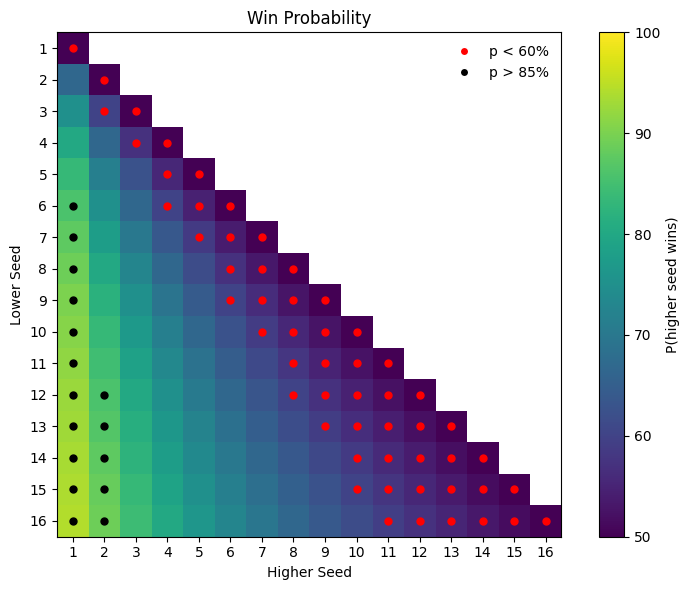

In [197]:
# Copy and transform matrix so all values are 50–100%
plot_matrix = prob_matrix.copy()

for i in range(16):          # ASeed
    for j in range(16):      # BSeed
        p = plot_matrix.iloc[i, j]

        # Keep only bottom-left triangle (ASeed >= BSeed)
        if i < j:
            plot_matrix.iloc[i, j] = np.nan
        else:
            plot_matrix.iloc[i, j] = max(p, 100 - p)

plt.figure(figsize=(8, 6))
img = plt.imshow(plot_matrix.values, vmin=50, vmax=100)
plt.colorbar(img, label='P(higher seed wins)')

plt.xticks(range(16), seeds)
plt.yticks(range(16), seeds)

plt.xlabel('Higher Seed')
plt.ylabel('Lower Seed')
plt.title('Win Probability')

for i in range(16):
    for j in range(16):
        p = plot_matrix.iloc[i, j]

        if np.isnan(p):
            continue

        low = 60
        high = 85

        if 50 <= p <= low:
            plt.scatter(j, i, marker='o', color = 'red', s=25)
        elif p >= high:
            plt.scatter(j, i, marker='o', color = 'black', s=25)

plt.legend(handles=[
    Line2D([0],[0], marker='o', color='w', label=f"p < {low}%", markerfacecolor='red', markersize=6),
    Line2D([0],[0], marker='o', color='w', label=f"p > {high}%", markerfacecolor='black', markersize=6)
], frameon=False)

plt.tight_layout()
plt.show()


# Stable Log Loss Assessments
Due to the low amount of training data, all models are evaluated across a for loop. In each for loop, a new random train/test split is performed (without setting seed), the model, is trained and evaluated, then the evaluation is average out across many iterations. Consider it similar to a bootstrapped approach.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from group_lasso import GroupLasso

### Identify Baseline Log-Loss (BCE) to Compare Models Against

In [38]:
baseline = log_loss(df['AWon'], np.full(len(df['AWon']), df['AWon'].mean()))
print(f"Baseline Log Loss: {baseline:.4f}")

Baseline Log Loss: 0.6929


### Defining Functions For Train-Test Split and Feature Selection

In [39]:
# split and scale the data differently each iteration of a for loop

def split_n_scale(df):
    # First split the data BEFORE any scaling
    X = df.drop(columns=['Season','ATeamName','BTeamName','AWon'])
    y = df['AWon'].astype(int)

    # Use stratified split to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

    # Initialize scaler - FIT ONLY on training data
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )

    # Transform test data using the SAME scaler (no fitting on test data)
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )

    # Create dataframes with outcomes for convenience
    train_df = X_train_scaled.copy()
    train_df['AWon'] = y_train

    test_df = X_test_scaled.copy()
    test_df['AWon'] = y_test

    return X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df

In [40]:
# obtain the columns selected by LASSO for a given alpha

def lasso_cols(X_train_scaled, y_train, alpha):
    # Setup for group LASSO - use TRAINING data only
    cols = X_train_scaled.columns

    base_features = sorted({
        c[:-2] for c in cols if c.endswith('_A')
    })

    assert all(f + '_B' in cols for f in base_features)

    X_cols = []
    groups = []

    group_id = 0
    for f in base_features:
        X_cols.extend([f + '_A', f + '_B'])
        groups.extend([group_id, group_id])
        group_id += 1

    # Use TRAINING data for feature selection
    X_lasso = X_train_scaled[X_cols].values
    y_lasso = y_train.values
    groups = np.array(groups)

    # After selecting features, fit on training and evaluate on test
    lasso = GroupLasso(
        groups=groups,
        group_reg=alpha,
        l1_reg=0.0,
        n_iter=1000,
        tol=1e-3,
        scale_reg="group_size",
        subsampling_scheme=1,
        supress_warning=True
    )

    lasso.fit(X_lasso, y_lasso)

    coef = lasso.coef_.ravel()
    selected_groups = np.unique(groups[np.abs(coef) > 1e-6])
    selected_base_features = [base_features[g] for g in selected_groups]

    selected_cols = []
    for f in selected_base_features:
        selected_cols.extend([f + '_A', f + '_B'])
    
    return selected_base_features, selected_cols

# LASSO

### Select Optimal Alpha Through Cross-Validation

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\group_lasso\_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\group_lasso\_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\group_lasso\_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
c:\Users\ethan\AppData\Local

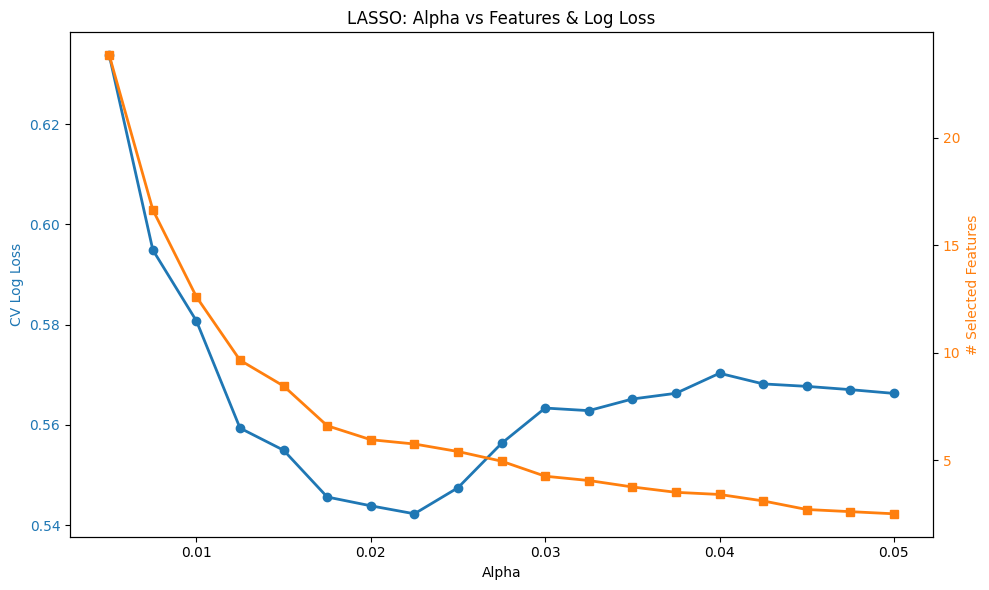

In [41]:
alpha_cv = []

for i in range(20):
    X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)
    
    # ============================================================================
    # LASSO Alpha Selection: Test different values and plot results
    # ============================================================================

    # Setup groups for LASSO
    cols = X_train_scaled.columns
    base_features = sorted({c[:-2] for c in cols if c.endswith('_A')})
    X_cols = []
    groups = []
    for g_id, f in enumerate(base_features):
        X_cols.extend([f + '_A', f + '_B'])
        groups.extend([g_id, g_id])

    X_lasso = X_train_scaled[X_cols].values
    y_lasso = y_train.values
    groups = np.array(groups)

    # Test different alphas
    alphas = np.linspace(0.005, 0.05, 19)
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    results = []

    for alpha in alphas:
        gl = GroupLasso(groups=groups, group_reg=alpha, l1_reg=0, fit_intercept=True,
                        scale_reg="group_size", supress_warning=True)
        gl.fit(X_lasso, y_lasso)
        
        selected_groups = [g for g in np.unique(groups) 
                        if np.linalg.norm(gl.coef_.ravel()[groups == g]) > 1e-4]
        n_features = len(selected_groups)
        
        if n_features == 0:
            results.append((alpha, 0, np.nan))
            continue
        
        X_reduced = X_lasso[:, np.isin(groups, selected_groups)]
        fold_losses = []
        
        for train_idx, val_idx in cv.split(X_reduced, y_lasso):
            clf = LogisticRegression(solver="lbfgs", max_iter=2000)
            clf.fit(X_reduced[train_idx], y_lasso[train_idx])
            fold_losses.append(log_loss(y_lasso[val_idx], 
                                        clf.predict_proba(X_reduced[val_idx])[:, 1]))
        
        results.append((alpha, n_features, np.mean(fold_losses)))

    results_df = pd.DataFrame(results, columns=["group_reg", "n_features", "cv_log_loss"])
    alpha_cv += [results_df]

results_df = pd.concat(alpha_cv).groupby("group_reg", as_index=False)[["n_features", "cv_log_loss"]].mean()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(results_df['group_reg'], results_df['cv_log_loss'], 
         marker='o', color='tab:blue', linewidth=2)
ax1.set_xlabel('Alpha'); ax1.set_ylabel('CV Log Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(results_df['group_reg'], results_df['n_features'], 
         marker='s', color='tab:orange', linewidth=2)
ax2.set_ylabel('# Selected Features', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.title('LASSO: Alpha vs Features & Log Loss')
plt.tight_layout()
plt.show()

### Select Alpha Based on Plot, Then Train

In [42]:
alpha = 0.02

In [43]:
lasso_train_LL = []
lasso_test_LL = []

for i in range(20):
    X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)
    selected_base_features, selected_cols = lasso_cols(X_train_scaled, y_train, alpha)

    print(f"LASSO Iteration {i+1}: Selected {len(selected_base_features)} feature groups ({len(selected_cols)} total features)")

    # Fit logistic regression on selected features
    clf = LogisticRegression(solver='lbfgs', max_iter=2000)
    clf.fit(X_train_scaled[selected_cols], y_train)

    # Evaluate on both train and test
    train_df['AProb_LASSO'] = clf.predict_proba(X_train_scaled[selected_cols])[:, 1]
    test_df['AProb_LASSO'] = clf.predict_proba(X_test_scaled[selected_cols])[:, 1]

    lasso_train_logloss = log_loss(y_train, train_df['AProb_LASSO'])
    lasso_test_logloss = log_loss(y_test, test_df['AProb_LASSO'])

    lasso_train_LL += [lasso_train_logloss]
    lasso_test_LL += [lasso_test_logloss]

print("")
print(f"LASSO Train Mean Log Loss: {round(np.mean(lasso_train_LL),3)}")
print(f"LASSO Test Mean Log Loss: {round(np.mean(lasso_test_LL),3)}")
print(f"LASSO STDEV Log Loss: {round(np.std(lasso_test_LL),3)}")

LASSO Iteration 1: Selected 16 feature groups (32 total features)
LASSO Iteration 2: Selected 21 feature groups (42 total features)
LASSO Iteration 3: Selected 17 feature groups (34 total features)
LASSO Iteration 4: Selected 15 feature groups (30 total features)
LASSO Iteration 5: Selected 17 feature groups (34 total features)
LASSO Iteration 6: Selected 17 feature groups (34 total features)
LASSO Iteration 7: Selected 25 feature groups (50 total features)
LASSO Iteration 8: Selected 19 feature groups (38 total features)
LASSO Iteration 9: Selected 19 feature groups (38 total features)
LASSO Iteration 10: Selected 15 feature groups (30 total features)
LASSO Iteration 11: Selected 20 feature groups (40 total features)
LASSO Iteration 12: Selected 18 feature groups (36 total features)
LASSO Iteration 13: Selected 19 feature groups (38 total features)
LASSO Iteration 14: Selected 18 feature groups (36 total features)
LASSO Iteration 15: Selected 17 feature groups (34 total features)
LASS

# ElasticNet

### Select Optimal C Through Cross-Validation

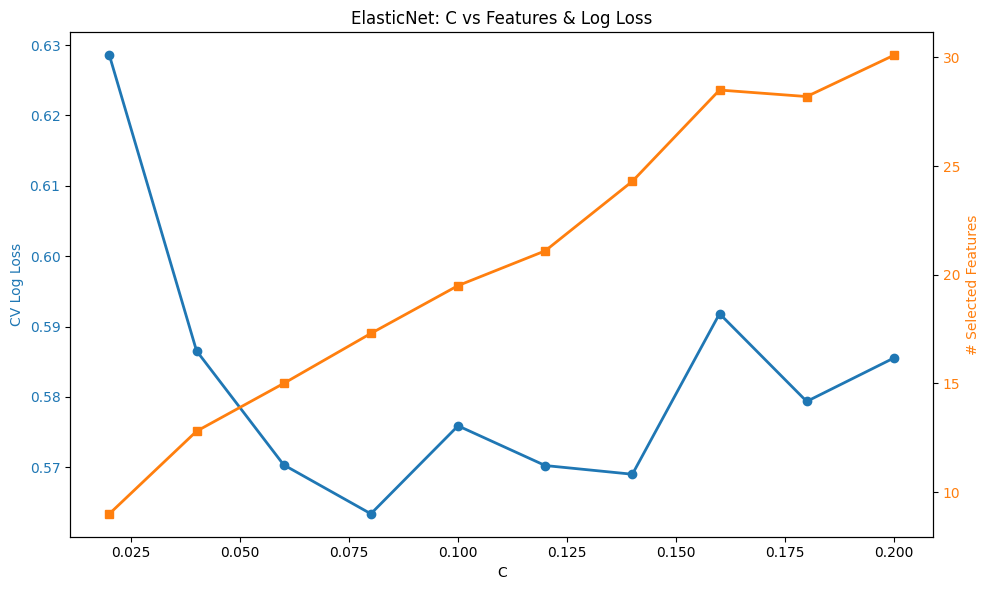

In [44]:
elastic_train_LL = []
elastic_test_LL = []

Cs = np.linspace(0.02, 0.2, 10)
results = []

for C in Cs:
    test_losses = []
    n_feats = []

    for i in range(10):
        X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)

        enet = LogisticRegression(
            penalty="elasticnet",
            solver="saga",          # required for elasticnet
            l1_ratio=0.7,           # 0 = ridge, 1 = lasso
            C=C,                    # inverse regularization strength
            max_iter=5000
        )

        enet.fit(X_train_scaled, y_train)

        p_test = enet.predict_proba(X_test_scaled)[:, 1]
        test_losses.append(log_loss(y_test, p_test))
        n_feats.append((np.abs(enet.coef_) > 1e-6).sum())

    results.append((C, np.mean(n_feats), np.mean(test_losses)))

results_df = pd.DataFrame(results, columns=["group_reg", "n_features", "cv_log_loss"])

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(results_df['group_reg'], results_df['cv_log_loss'], 
         marker='o', color='tab:blue', linewidth=2)
ax1.set_xlabel('C'); ax1.set_ylabel('CV Log Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(results_df['group_reg'], results_df['n_features'], 
         marker='s', color='tab:orange', linewidth=2)
ax2.set_ylabel('# Selected Features', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.title('ElasticNet: C vs Features & Log Loss')
plt.tight_layout()
plt.show()

### Select C Based on Plot, Then Train

In [ ]:
C = 0.1

In [ ]:
elastic_train_LL = []
elastic_test_LL = []

for i in range(20):
    X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)

    enet = LogisticRegression(
        penalty="elasticnet",
        solver="saga",          # required for elasticnet
        l1_ratio=0.7,           # 0 = ridge, 1 = lasso
        C=C,                    # inverse regularization strength
        max_iter=5000
    )

    enet.fit(X_train_scaled, y_train)

    # Evaluate on both train and test
    train_df['AProb_ELASTIC'] = enet.predict_proba(X_train_scaled)[:, 1]
    test_df['AProb_ELASTIC'] = enet.predict_proba(X_test_scaled)[:, 1]

    elastic_train_logloss = log_loss(y_train, train_df['AProb_ELASTIC'])
    elastic_test_logloss = log_loss(y_test, test_df['AProb_ELASTIC'])

    print(f"ElasticNet Iteration {i+1}: Selected {(np.abs(enet.coef_) > 1e-6).sum()} features")

    elastic_train_LL += [elastic_train_logloss]
    elastic_test_LL += [elastic_test_logloss]

print("")
print(f"ElasticNet Train Mean Log Loss: {round(np.mean(elastic_train_LL),3)}")
print(f"ElasticNet Test Mean Log Loss: {round(np.mean(elastic_test_LL),3)}")
print(f"ElasticNet STDEV Log Loss: {round(np.std(elastic_test_LL),3)}")

ElasticNet Iteration 1: Selected 28 features
ElasticNet Iteration 2: Selected 22 features
ElasticNet Iteration 3: Selected 23 features
ElasticNet Iteration 4: Selected 21 features
ElasticNet Iteration 5: Selected 28 features
ElasticNet Iteration 6: Selected 21 features
ElasticNet Iteration 7: Selected 20 features
ElasticNet Iteration 8: Selected 21 features
ElasticNet Iteration 9: Selected 24 features
ElasticNet Iteration 10: Selected 24 features
ElasticNet Iteration 11: Selected 25 features
ElasticNet Iteration 12: Selected 19 features
ElasticNet Iteration 13: Selected 24 features
ElasticNet Iteration 14: Selected 23 features
ElasticNet Iteration 15: Selected 27 features
ElasticNet Iteration 16: Selected 17 features
ElasticNet Iteration 17: Selected 15 features
ElasticNet Iteration 18: Selected 20 features
ElasticNet Iteration 19: Selected 17 features
ElasticNet Iteration 20: Selected 17 features

ElasticNet Train Mean Log Loss: 0.523
ElasticNet Test Mean Log Loss: 0.569
ElasticNet ST

# Gradient Boosting

In [46]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier


c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Use Optuna to Select Best Hyperparameters

In [47]:
def objective(trial):
    # Hyperparameters to tune
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 4),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 5, 50),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    }

    X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)
    selected_base_features, selected_cols = lasso_cols(X_train_scaled, y_train, alpha)

    X_train_boost = X_train_scaled[selected_cols]
    X_test_boost = X_test_scaled[selected_cols]

    model = GradientBoostingClassifier(**params)
    model.fit(X_train_boost, y_train)

    probs = model.predict_proba(X_test_boost)[:, 1]
    return log_loss(y_test, probs)


In [48]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

[I 2026-01-17 12:07:50,232] A new study created in memory with name: no-name-e418e020-a8dd-4e68-96c5-5a508c37a2a4
[I 2026-01-17 12:07:51,168] Trial 0 finished with value: 0.5474861173538154 and parameters: {'n_estimators': 159, 'learning_rate': 0.05445667630040581, 'max_depth': 1, 'min_samples_leaf': 11, 'subsample': 0.8980131175216307}. Best is trial 0 with value: 0.5474861173538154.
[I 2026-01-17 12:07:53,122] Trial 1 finished with value: 0.5489997167232845 and parameters: {'n_estimators': 663, 'learning_rate': 0.030231683708263502, 'max_depth': 4, 'min_samples_leaf': 41, 'subsample': 0.5496987734057024}. Best is trial 0 with value: 0.5474861173538154.
[I 2026-01-17 12:07:55,999] Trial 2 finished with value: 0.5537750844642664 and parameters: {'n_estimators': 687, 'learning_rate': 0.010119874810202906, 'max_depth': 3, 'min_samples_leaf': 26, 'subsample': 0.658225794127542}. Best is trial 0 with value: 0.5474861173538154.
[I 2026-01-17 12:07:57,455] Trial 3 finished with value: 0.5875

### Average Best Hyperparameter Across Subset of Best Trials
Due to small size of dataset, any one trial's results are not trustworthy

In [49]:
top_trials = sorted(study.trials, key=lambda t: t.value)[:10]

params_df = pd.DataFrame([t.params for t in top_trials])
avg_params = params_df.mean()
avg_log_loss = np.mean([t.value for t in top_trials])

print(f"Average CV Log Loss (top 10): {round(avg_log_loss, 4)}")
print("\nAverage hyperparameters from top 10 trials:")
for k, v in avg_params.items():
    print(f"  {k}: {round(v, 4)}")

Average CV Log Loss (top 10): 0.5645

Average hyperparameters from top 10 trials:
  n_estimators: 388.0
  learning_rate: 0.0471
  max_depth: 2.0
  min_samples_leaf: 20.1
  subsample: 0.7672


In [50]:
print("Best Log Loss:", round(study.best_value, 4))
print("Best Parameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

Best Log Loss: 0.5148
Best Parameters:
  n_estimators: 115
  learning_rate: 0.08549293351453678
  max_depth: 1
  min_samples_leaf: 5
  subsample: 0.8326281946480552


### Train Gradient Boosting Based on These Hyperparametes

In [51]:
boost_train_LL = []
boost_test_LL = []

for i in range(10):
    X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)
    selected_base_features, selected_cols = lasso_cols(X_train_scaled, y_train, alpha)

    X_train_boost = X_train_scaled[selected_cols]
    X_test_boost = X_test_scaled[selected_cols]

    gbt = GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=3,
        min_samples_leaf=20,
        subsample=0.75
    )

    gbt.fit(X_train_boost, y_train)

    if i%5 == 0:
        print(f"Iteration {i} complete.")

    # Evaluate on test set
    train_df['AProb_BOOST'] = gbt.predict_proba(X_train_boost)[:, 1]
    test_df['AProb_BOOST'] = gbt.predict_proba(X_test_boost)[:, 1]

    boost_train_logloss = log_loss(y_train, train_df['AProb_BOOST'])
    boost_test_logloss = log_loss(y_test, test_df['AProb_BOOST'])

    boost_train_LL += [boost_train_logloss]
    boost_test_LL += [boost_test_logloss]

print("")
print(f"Boosting Train Mean Log Loss: {round(np.mean(boost_train_LL),3)}")
print(f"Boosting Test Mean Log Loss: {round(np.mean(boost_test_LL),3)}")
print(f"Boosting STDEV Log Loss: {round(np.std(boost_test_LL),3)}")

Iteration 0 complete.
Iteration 5 complete.

Boosting Train Mean Log Loss: 0.298
Boosting Test Mean Log Loss: 0.588
Boosting STDEV Log Loss: 0.051


# Neural Network

In [52]:
import tensorflow as tf

### Train Neural Network
Hyperparameter selection is an art form, but using a very small network due to small dataset size

In [ ]:
def objective(trial):

    # Hyperparameters to tune
    n1 = trial.suggest_int("n1", 4, 32)
    n2 = trial.suggest_int("n2", 2, 16)
    lr = trial.suggest_float("lr", 1e-4, 5e-3, log=True)
    l2 = trial.suggest_float("l2", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 32])

    nn_test_LL = []

    for _ in range(5):
        X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)
        selected_base_features, selected_cols = lasso_cols(X_train_scaled, y_train, alpha)

        X_train_nn = X_train_scaled[selected_cols]
        X_test_nn  = X_test_scaled[selected_cols]

        model = tf.keras.Sequential([
            tf.keras.layers.Input((len(selected_cols),)),
            tf.keras.layers.Dense(n1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
            tf.keras.layers.Dense(n2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='binary_crossentropy'
        )

        model.fit(
            X_train_nn, y_train,
            validation_split=0.3,
            epochs=200,
            batch_size=batch_size,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=30,
                    restore_best_weights=True
                )
            ],
            verbose=0
        )

        preds = model.predict(X_test_nn, verbose=0).ravel()
        nn_test_LL.append(log_loss(y_test, preds))

    return np.mean(nn_test_LL)


In [232]:
# if running overnight: n_trials * reps per trial <= ~1000 (40 trials, 25 reps per trial?)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2026-01-22 11:01:49,985] A new study created in memory with name: no-name-18e6acbd-4360-4a97-9b2b-9fd43fa70ccb
[I 2026-01-22 11:02:33,700] Trial 0 finished with value: 0.5937746832380115 and parameters: {'n1': 15, 'n2': 16, 'lr': 0.0015419027554072927, 'l2': 7.559887126921723e-05, 'batch_size': 32}. Best is trial 0 with value: 0.5937746832380115.
[I 2026-01-22 11:03:29,648] Trial 1 finished with value: 0.6325231925101601 and parameters: {'n1': 8, 'n2': 10, 'lr': 0.002160154017537955, 'l2': 3.60528560622493e-05, 'batch_size': 16}. Best is trial 0 with value: 0.5937746832380115.
[I 2026-01-22 11:05:06,170] Trial 2 finished with value: 0.6233829797647867 and parameters: {'n1': 14, 'n2': 8, 'lr': 0.0003380624460053275, 'l2': 2.1381886343035717e-05, 'batch_size': 8}. Best is trial 0 with value: 0.5937746832380115.
[I 2026-01-22 11:05:56,171] Trial 3 finished with value: 0.5572783672643458 and parameters: {'n1': 16, 'n2': 6, 'lr': 0.0039192305628511686, 'l2': 0.0015831133290967246, 'batch

In [233]:
top_trials = sorted(
    [t for t in study.trials if t.value is not None],
    key=lambda t: t.value
)[:5]

for t in top_trials:
    print({**t.params, "result": round(t.value, 4)})

{'n1': 23, 'n2': 2, 'lr': 0.004517528421298498, 'l2': 0.00531314465648503, 'batch_size': 8, 'result': 0.553}
{'n1': 16, 'n2': 6, 'lr': 0.0039192305628511686, 'l2': 0.0015831133290967246, 'batch_size': 8, 'result': 0.5573}
{'n1': 13, 'n2': 4, 'lr': 0.0009193476354559471, 'l2': 0.004463569115763485, 'batch_size': 16, 'result': 0.5663}
{'n1': 9, 'n2': 10, 'lr': 0.0005918776300640081, 'l2': 0.002435718367331289, 'batch_size': 32, 'result': 0.5676}
{'n1': 10, 'n2': 2, 'lr': 0.0009785263988727143, 'l2': 0.0004614199954223087, 'batch_size': 16, 'result': 0.5806}


In [ ]:
nn_train_LL = []
nn_test_LL = []

for i in range(50):
    X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)
    selected_base_features, selected_cols = lasso_cols(X_train_scaled, y_train, alpha)

    # Use selected features
    X_train_nn = X_train_scaled[selected_cols]
    X_test_nn = X_test_scaled[selected_cols]

    nn = tf.keras.models.Sequential([
    tf.keras.layers.Input((len(selected_cols),)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy'],
        weighted_metrics=[]
    )

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=40,
            restore_best_weights=True
        )
    ]

    fit = nn.fit(
        X_train_nn, y_train,
        epochs=200,
        batch_size=16,
        validation_split=0.3,
        callbacks=callbacks,
        verbose=0
    )

    if i%5 == 0:
        print(f"Iteration {i} complete.")

    # Evaluate on test set
    train_df['AProb_NN'] = nn.predict(X_train_nn, verbose=0).ravel()
    test_df['AProb_NN'] = nn.predict(X_test_nn, verbose=0).ravel()

    nn_train_logloss = log_loss(y_train, train_df['AProb_NN'])
    nn_test_logloss = log_loss(y_test, test_df['AProb_NN'])

    nn_train_LL += [nn_train_logloss]
    nn_test_LL += [nn_test_logloss]
 
print("")
print(f"NN Train Mean Log Loss: {round(np.mean(nn_train_LL),3)}")
print(f"NN Test Mean Log Loss: {round(np.mean(nn_test_LL),3)}")
print(f"NN STDEV Log Loss: {round(np.std(nn_test_LL),3)}")

Iteration 0 complete.
Iteration 5 complete.
Iteration 10 complete.
Iteration 15 complete.
Iteration 20 complete.
Iteration 25 complete.
Iteration 30 complete.
Iteration 35 complete.
Iteration 40 complete.
Iteration 45 complete.

NN Train Mean Log Loss: 0.531
NN Test Mean Log Loss: 0.621
NN STDEV Log Loss: 0.046


# MoE

In [54]:
# coef_list = []
# intercept_list = []
# moe_train_LL = []
# moe_test_LL = []

# for i in range(3):
#     X_train_scaled, X_test_scaled, y_train, y_test, train_df, test_df = split_n_scale(df)
#     selected_base_features, selected_cols = lasso_cols(X_train_scaled, y_train, alpha)

#     # Fit logistic regression on selected features
#     clf = LogisticRegression(solver='lbfgs', max_iter=2000)
#     clf.fit(X_train_scaled[selected_cols], y_train)

#     enet = LogisticRegression(
#         penalty="elasticnet",
#         solver="saga",          # required for elasticnet
#         l1_ratio=0.7,           # 0 = ridge, 1 = lasso
#         C=0.1,                  # inverse regularization strength
#         max_iter=5000
#     )

#     enet.fit(X_train_scaled, y_train)

#     X_train_boost = X_train_scaled[selected_cols]
#     X_test_boost = X_test_scaled[selected_cols]

#     gbt = GradientBoostingClassifier(
#         n_estimators=500,
#         learning_rate=0.01,
#         max_depth=3,
#         min_samples_leaf=20,
#         subsample=0.75
#     )
#     gbt.fit(X_train_boost, y_train)

#     # Use selected features
#     X_train_nn = X_train_scaled[selected_cols]
#     X_test_nn = X_test_scaled[selected_cols]

#     nn = tf.keras.models.Sequential([
#     tf.keras.layers.Input((len(selected_cols),)),
#     tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
#     tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#     ])

#     nn.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#         loss='binary_crossentropy',
#         metrics=['accuracy'],
#         weighted_metrics=[]
#     )

#     callbacks = [
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=40,
#             restore_best_weights=True
#         )
#     ]

#     fit = nn.fit(
#         X_train_nn, y_train,
#         epochs=200,
#         batch_size=16,
#         validation_split=0.3,
#         callbacks=callbacks,
#         verbose=0
#     )

#     # Evaluate on test set
#     test_df['AProb_LASSO'] = clf.predict_proba(X_test_scaled[selected_cols])[:, 1]
#     test_df['AProb_ELASTIC'] = enet.predict_proba(X_test_scaled)[:, 1]
#     test_df['AProb_BOOST'] = gbt.predict_proba(X_test_boost)[:, 1]
#     test_df['AProb_NN'] = nn.predict(X_test_nn, verbose=0).ravel()

#     ######################################
#     # Mix the Experts!
#     ######################################

#     prob_cols = ["AProb_LASSO", "AProb_ELASTIC", "AProb_BOOST", "AProb_NN"]
#     moe_cols = selected_cols + prob_cols
#     X_experts = test_df[moe_cols].values
#     y_experts = test_df["AWon"].astype(int).values
#     X_experts_train, X_experts_test, y_experts_train, y_experts_test = train_test_split(X_experts, y_experts, test_size=0.4, stratify=y_experts)

#     moe = LogisticRegression(
#         penalty="l2",
#         C=1.0,
#         solver="lbfgs",
#         max_iter=1000,
#         fit_intercept=False
#     )

#     moe.fit(X_experts_train, y_experts_train)
#     coef_list.append(moe.coef_[0].copy())

#     # Evaluate
#     moe_train_probs = moe.predict_proba(X_experts_train)[:, 1]
#     moe_test_probs = moe.predict_proba(X_experts_test)[:, 1]

#     moe_train_logloss = log_loss(y_experts_train, moe_train_probs)
#     moe_test_logloss = log_loss(y_experts_test, moe_test_probs)

#     moe_train_LL += [moe_train_logloss]
#     moe_test_LL += [moe_test_logloss]

#     if i%25 == 0:
#         print(f"Iteration {i} complete.")

# avg_coef = np.mean(coef_list, axis=0)
# weights_raw = np.abs(avg_coef)
# weights = weights_raw / weights_raw.sum()

# print("")
# print("Normalized MOE weights (percent):")
# for col, w in zip(prob_cols, weights):
#     print(f"{col}: {100*w:.1f}%")
# print("")
# print(f"MOE Train Mean Log Loss: {round(np.mean(moe_train_LL),3)}")
# print(f"MOE Test Mean Log Loss: {round(np.mean(moe_test_LL),3)}")
# print(f"MOE STDEV Log Loss: {round(np.std(moe_test_LL),3)}")

# Overall Evaluation

In [55]:
print("")
print(f"LASSO Train Mean Log Loss: {round(np.mean(lasso_train_LL),3)}")
print(f"LASSO Test Mean Log Loss: {round(np.mean(lasso_test_LL),3)}")
print(f"LASSO STDEV Log Loss: {round(np.std(lasso_test_LL),3)}")
print("")
print(f"ElasticNet Train Mean Log Loss: {round(np.mean(elastic_train_LL),3)}")
print(f"ElasticNet Test Mean Log Loss: {round(np.mean(elastic_test_LL),3)}")
print(f"ElasticNet STDEV Log Loss: {round(np.std(elastic_test_LL),3)}")
print("")
print(f"Boosting Train Mean Log Loss: {round(np.mean(boost_train_LL),3)}")
print(f"Boosting Test Mean Log Loss: {round(np.mean(boost_test_LL),3)}")
print(f"Boosting STDEV Log Loss: {round(np.std(boost_test_LL),3)}")
print("")
print(f"NN Train Mean Log Loss: {round(np.mean(nn_train_LL),3)}")
print(f"NN Test Mean Log Loss: {round(np.mean(nn_test_LL),3)}")
print(f"NN STDEV Log Loss: {round(np.std(nn_test_LL),3)}")


LASSO Train Mean Log Loss: 0.467
LASSO Test Mean Log Loss: 0.57
LASSO STDEV Log Loss: 0.047

ElasticNet Train Mean Log Loss: 0.523
ElasticNet Test Mean Log Loss: 0.569
ElasticNet STDEV Log Loss: 0.024

Boosting Train Mean Log Loss: 0.298
Boosting Test Mean Log Loss: 0.588
Boosting STDEV Log Loss: 0.051

NN Train Mean Log Loss: 0.54
NN Test Mean Log Loss: 0.574
NN STDEV Log Loss: 0.034


# Establish Baseline Based on Seeds Alone

In [237]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.lines import Line2D

### Train Model With Log Seed Ratio

In [247]:
# add epsilon so that 1 and 2 aren't treated so differently
epsilon = 1
X = np.log((epsilon + df['BSeed']) / (epsilon + df['ASeed'])).to_frame(name='log_seed_ratio')
y = df['AWon']

logit = LogisticRegression(
    fit_intercept=False,
    C=10000,              # weaker regularization → more extreme probs
    solver='lbfgs'
)

logit.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10000
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Define Function to Predict Given Two Seeds

In [248]:
def predict_win_prob(seed_a, seed_b, model=logit):
    X_new = pd.DataFrame({
        'log_seed_ratio': [np.log(seed_b / seed_a)]
    })
    
    prediction = model.predict_proba(X_new)[0, 1]
    return round(prediction * 100, 1)

predict_win_prob(1, 16)

np.float64(94.2)

### Create 16x16 Matrix, Use This Function to Predict, and Plot Results

In [249]:
seeds = np.arange(1, 17)

prob_matrix = pd.DataFrame(
    [[predict_win_prob(a, b) for b in seeds] for a in seeds],
    index=seeds,
    columns=seeds
)

prob_matrix.index.name = "ASeed"
prob_matrix.columns.name = "BSeed"

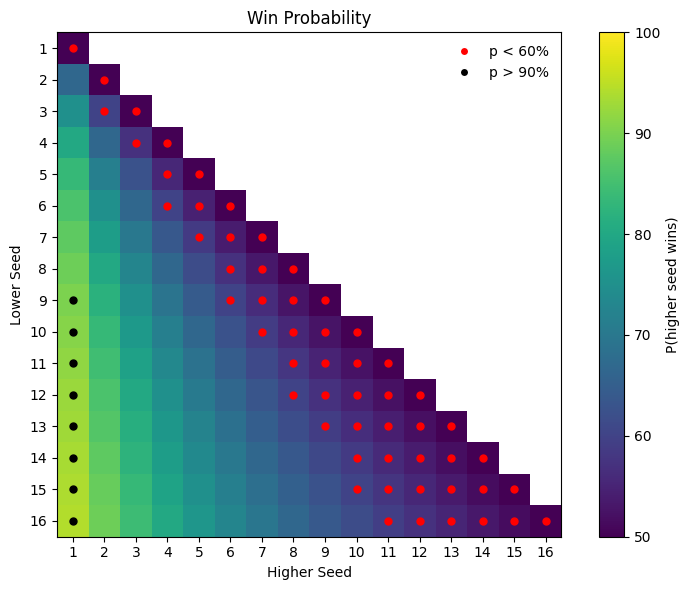

In [250]:
# Copy and transform matrix so all values are 50–100%
plot_matrix = prob_matrix.copy()

for i in range(16):          # ASeed
    for j in range(16):      # BSeed
        p = plot_matrix.iloc[i, j]

        # Keep only bottom-left triangle (ASeed >= BSeed)
        if i < j:
            plot_matrix.iloc[i, j] = np.nan
        else:
            plot_matrix.iloc[i, j] = max(p, 100 - p)

plt.figure(figsize=(8, 6))
img = plt.imshow(plot_matrix.values, vmin=50, vmax=100)
plt.colorbar(img, label='P(higher seed wins)')

plt.xticks(range(16), seeds)
plt.yticks(range(16), seeds)

plt.xlabel('Higher Seed')
plt.ylabel('Lower Seed')
plt.title('Win Probability')

for i in range(16):
    for j in range(16):
        p = plot_matrix.iloc[i, j]

        if np.isnan(p):
            continue

        low = 60
        high = 90

        if 50 <= p <= low:
            plt.scatter(j, i, marker='o', color = 'red', s=25)
        elif p >= high:
            plt.scatter(j, i, marker='o', color = 'black', s=25)

plt.legend(handles=[
    Line2D([0],[0], marker='o', color='w', label=f"p < {low}%", markerfacecolor='red', markersize=6),
    Line2D([0],[0], marker='o', color='w', label=f"p > {high}%", markerfacecolor='black', markersize=6)
], frameon=False)

plt.tight_layout()
plt.show()

In [253]:
team_data.dropna()[['NET RPI', 'Seed']]

KeyError: "['Seed'] not in index"

# Deploy

### Make Predictions On Entire Dataset Using 10-Fold Cross-Validation

In [198]:
# First split the data BEFORE any scaling
X = df.drop(columns=['Season','ATeamName','BTeamName','AWon'])
y = df['AWon'].astype(int)

# Initialize scaler - FIT ONLY on training data
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

In [199]:
df_predictions = df.copy()

df_predictions['AProb_LASSO']   = np.nan
df_predictions['AProb_ELASTIC'] = np.nan
df_predictions['AProb_BOOST']   = np.nan
df_predictions['AProb_NN']      = np.nan

skf = StratifiedKFold(n_splits=10, shuffle=True)

In [200]:
for train_idx, val_idx in skf.split(X_scaled, y):
    X_tr, X_val = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    clf = LogisticRegression(solver='lbfgs', max_iter=2000)
    clf.fit(X_tr[selected_cols], y_tr)

    df_predictions.iloc[val_idx, df_predictions.columns.get_loc('AProb_LASSO')] = (clf.predict_proba(X_val[selected_cols])[:, 1])

    enet = LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        l1_ratio=0.7,
        C=0.1,
        max_iter=5000
    )
    enet.fit(X_tr, y_tr)

    df_predictions.iloc[val_idx, df_predictions.columns.get_loc('AProb_ELASTIC')] = (enet.predict_proba(X_val)[:, 1])

    gbt = GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=3,
        min_samples_leaf=20,
        subsample=0.75
    )
    gbt.fit(X_tr[selected_cols], y_tr)

    df_predictions.iloc[val_idx, df_predictions.columns.get_loc('AProb_BOOST')] = (gbt.predict_proba(X_val[selected_cols])[:, 1])

    X_tr = X_scaled.iloc[train_idx][selected_cols].values
    X_val = X_scaled.iloc[val_idx][selected_cols].values

    nn = tf.keras.models.Sequential([
        tf.keras.layers.Input((X_tr.shape[1],)),
        tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
        tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy'
    )

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=40,
            restore_best_weights=True
        )
    ]

    nn.fit(
        X_tr, y_tr,
        epochs=200,
        batch_size=16,
        validation_split=0.3,
        callbacks=callbacks,
        verbose=0
    )

    df_predictions.iloc[val_idx, df_predictions.columns.get_loc('AProb_NN')] = (nn.predict(X_val, verbose=0).ravel())

df_predictions[['AProb_LASSO','AProb_ELASTIC','AProb_BOOST','AProb_NN']].isna().sum()

AProb_LASSO      0
AProb_ELASTIC    0
AProb_BOOST      0
AProb_NN         0
dtype: int64

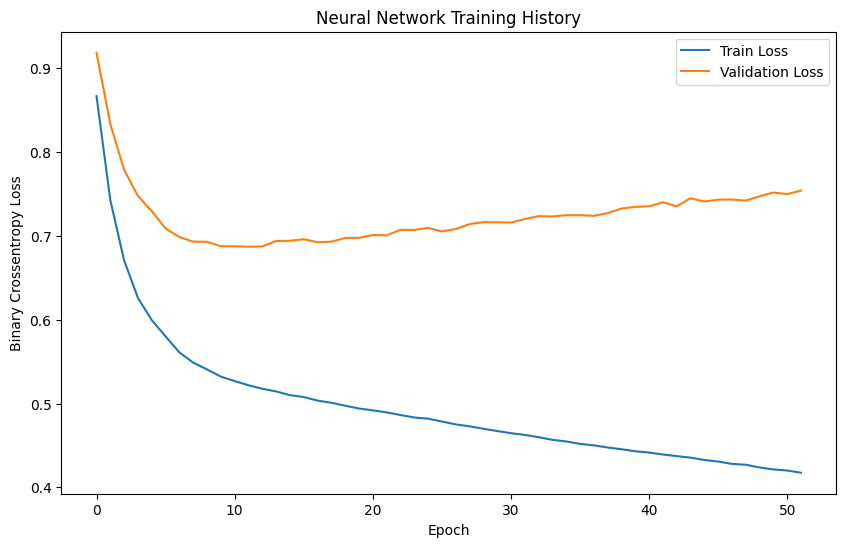

In [201]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(fit.history['loss'], label='Train Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.title('Neural Network Training History')
plt.show()

### Plot Prediction Correlations Between Models

In [202]:
import seaborn as sns

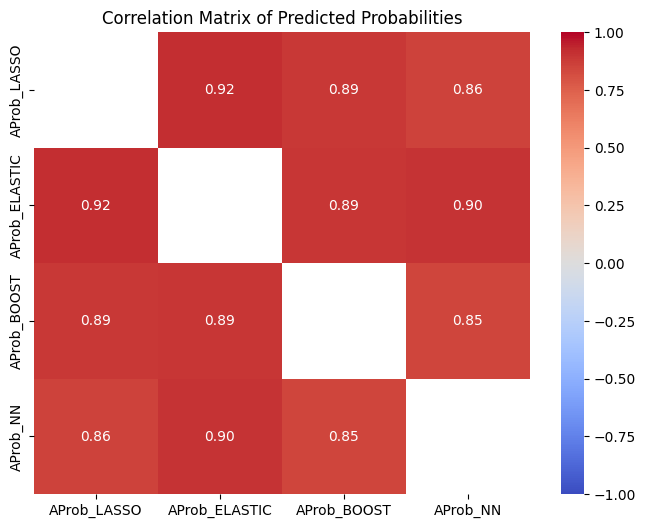

In [203]:
# Select only the columns you care about
cols = ['AProb_LASSO', 'AProb_ELASTIC', 'AProb_BOOST', 'AProb_NN']
corr_matrix = df_predictions[cols].corr()
np.fill_diagonal(corr_matrix.values, np.nan)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Predicted Probabilities")
plt.show()

### Convert Probabilities/Results in Terms of the Favorite (Higher Seed)

In [204]:
df_predictions['FWon'] = np.where(
    df_predictions['ASeed'] <= df_predictions['BSeed'],
    df_predictions['AWon'].astype(bool),
    (~df_predictions['AWon'].astype(bool))
)


for model in ['LASSO', 'ELASTIC', 'BOOST', 'NN']:
    prob_col = f"AProb_{model}"
    fprob_col = f"FProb_{model}"

    df_predictions[fprob_col] = np.where(
        df_predictions['ASeed'] <= df_predictions['BSeed'],
        df_predictions[prob_col],
        np.where(
            df_predictions['BSeed'] < df_predictions['ASeed'],
            1 - df_predictions[prob_col],
            0.5
        )
    )

### Check the Range of Predictions for a Particular Seed Matchup

In [226]:
seeds = [3,14]
df_predictions[(df_predictions['ASeed'].isin(seeds)) & (df_predictions['BSeed'].isin(seeds))].sort_values('FProb_ELASTIC', ascending=False)

,Season,ATeamName,BTeamName,ASeed,BSeed,AWon,KPI #_A,SOS_A,NET RPI_A,RESUME_A,...,ELITE SOS_B,AProb_LASSO,AProb_ELASTIC,AProb_BOOST,AProb_NN,FWon,FProb_LASSO,FProb_ELASTIC,FProb_BOOST,FProb_NN
139,2019,Old Dominion,Purdue,14.0,3.0,False,0.160,-0.023,100.0,105.0,...,35.323,0.028951,0.069648,0.091948,0.121151,True,0.971049,0.930352,0.908052,0.878849
392,2024,Kentucky,Oakland,3.0,14.0,False,0.285,0.128,19.0,12.0,...,15.066,0.952991,0.904845,0.922469,0.862588,False,0.952991,0.904845,0.922469,0.862588
284,2022,Montana St,Texas Tech,14.0,3.0,False,0.086,-0.106,120.0,163.0,...,35.796,0.024837,0.114173,0.095139,0.508131,True,0.975163,0.885827,0.904861,0.491869
152,2019,N Kentucky,Texas Tech,14.0,3.0,False,0.048,-0.112,115.0,170.0,...,29.682,0.042169,0.129272,0.075783,0.143905,True,0.957831,0.870728,0.924217,0.856095
334,2023,Baylor,UC Santa Barbara,3.0,14.0,True,0.340,0.198,15.0,4.0,...,10.607,0.911171,0.869518,0.777817,0.885568,True,0.911171,0.869518,0.777817,0.885568
382,2024,Akron,Creighton,14.0,3.0,False,0.087,-0.048,106.0,131.0,...,33.229,0.075899,0.133632,0.092320,0.406199,True,0.924101,0.866368,0.907680,0.593801
207,2021,Morehead St,West Virginia,14.0,3.0,False,0.123,-0.062,122.0,139.0,...,34.198,0.171239,0.145332,0.323467,0.117947,True,0.828761,0.854668,0.676533,0.882053
398,2024,Baylor,Colgate,3.0,14.0,True,0.308,0.147,13.0,8.0,...,11.190,0.867565,0.851150,0.685122,0.892104,True,0.867565,0.851150,0.685122,0.892104
269,2022,Longwood,Tennessee,14.0,3.0,False,0.036,-0.161,125.0,162.0,...,34.071,0.077564,0.150767,0.154015,0.374967,True,0.922436,0.849233,0.845985,0.625033
26,2017,Iona,Oregon,14.0,3.0,False,0.054,-0.029,88.0,140.0,...,23.710,0.054757,0.151937,0.084167,0.113673,True,0.945243,0.848063,0.915833,0.886327


### Compare Calibration Across Models

C:\Users\ethan\AppData\Local\Temp\ipykernel_20040\318032443.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = (df_cal.groupby('bucket').agg(avg_pred_prob=(prob_col, 'mean'), win_rate=('AWon', 'mean')))
C:\Users\ethan\AppData\Local\Temp\ipykernel_20040\318032443.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = (df_cal.groupby('bucket').agg(avg_pred_prob=(prob_col, 'mean'), win_rate=('AWon', 'mean')))
C:\Users\ethan\AppData\Local\Temp\ipykernel_20040\318032443.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

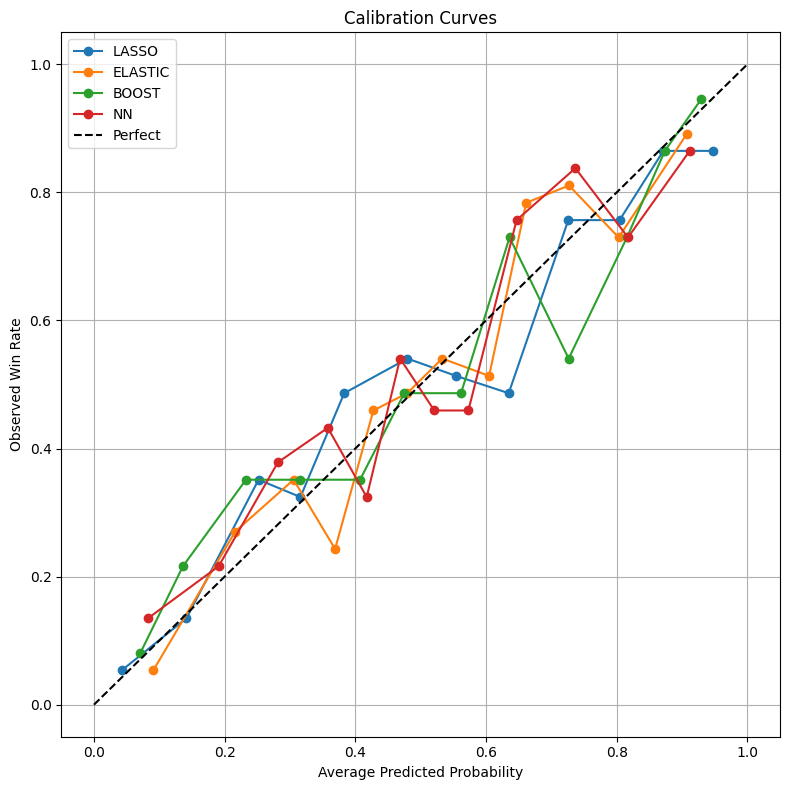

In [224]:
models = ['LASSO', 'ELASTIC', 'BOOST', 'NN']

plt.figure(figsize=(8, 8))

for model in models:
    prob_col = f"AProb_{model}"

    df_cal = df_predictions[[prob_col, 'AWon']].copy()
    df_cal['bucket'] = pd.qcut(df_cal[prob_col], q=12, duplicates='drop')

    calibration = (df_cal.groupby('bucket').agg(avg_pred_prob=(prob_col, 'mean'), win_rate=('AWon', 'mean')))

    plt.plot(calibration['avg_pred_prob'], calibration['win_rate'], marker='o', label=model)

# Perfect calibration line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfect')

plt.xlabel("Average Predicted Probability")
plt.ylabel("Observed Win Rate")
plt.title("Calibration Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Add in Baseline Probabilities Based on Seed Alone and Calculate Lift

In [208]:
df_seed_probs = pd.DataFrame(prob_matrix.stack()).reset_index().rename(columns = {0: 'SProb'})
df_upsets = df_predictions.drop(columns = ['AProb_LASSO', 'AProb_ELASTIC', 'AProb_BOOST', 'AProb_NN']).merge(df_seed_probs, how='left')

df_upsets['SProb'] = np.where(
    df_upsets['ASeed'] <= df_upsets['BSeed'],
    df_upsets['SProb']/100,
    (100 - df_upsets['SProb'])/100
)

# add epsilon to make lift values less extreme at the tails (less likely to predict 16v1 or 15v2)
epsilon = 1
df_upsets['Lift'] = np.log((epsilon + df_upsets['FProb_ELASTIC']) / (epsilon + (1 - df_upsets['FProb_ELASTIC']))) - np.log((epsilon + df_upsets['SProb']) / (epsilon + (1 - df_upsets['SProb'])))
df_upsets = df_upsets.merge(mm_results[['Season', 'ATeamName', 'BTeamName', 'Round']], on=['Season', 'ATeamName', 'BTeamName'], how = 'left')
df_upsets.drop_duplicates(inplace=True)

### Find The Number of Upsets That Occur in Each Round

In [209]:
round_stats = (
    df_upsets
    .groupby('Round')
    .apply(lambda g: pd.Series({
        'LowerSeedWins': (((g['ASeed'] > g['BSeed']) & (g['AWon'] == 1)) |
                          ((g['BSeed'] > g['ASeed']) & (g['AWon'] == 0))).sum(),
        'TotalGames': g.shape[0]
    }))
    .assign(Percent=lambda x: x['LowerSeedWins'] / x['TotalGames'] * 100)
    .reset_index()
)

round_stats

C:\Users\ethan\AppData\Local\Temp\ipykernel_20040\1410862983.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,Round,LowerSeedWins,TotalGames,Percent
0,Play-in games,0,4,0.000000
1,Round 1,65,223,29.147982
2,Round 2,30,112,26.785714
3,Round 3 (Sweet Sixteen),24,56,42.857143
4,Round 4 (Elite Eight),11,28,39.285714
5,Round 5 (Final Four),2,14,14.285714
6,Round 6 (National Final),0,7,0.000000


### Find Lift Thresholds for Each Round

In [217]:
df_upsets[(df_upsets['Round'] == 'Round 4 (Elite Eight)')].sort_values(by = 'Lift', ascending = True)[5:15]

,Season,ATeamName,BTeamName,ASeed,BSeed,AWon,KPI #_A,SOS_A,NET RPI_A,RESUME_A,...,PPPD_B,ELITE SOS_B,FWon,FProb_LASSO,FProb_ELASTIC,FProb_BOOST,FProb_NN,SProb,Lift,Round
318,2022,Kansas,Miami FL,1.0,10.0,True,0.407,0.185,6.0,1.0,...,1.048,27.253,True,0.817195,0.730326,0.823768,0.688912,0.910,-0.251376,Round 4 (Elite Eight)
58,2017,Gonzaga,Xavier,1.0,11.0,True,0.339,0.021,8.0,8.0,...,1.040,32.401,True,0.807303,0.745315,0.829777,0.733107,0.917,-0.240976,Round 4 (Elite Eight)
60,2017,Kentucky,North Carolina,2.0,1.0,False,0.345,0.135,4.0,9.0,...,0.979,35.516,True,0.732106,0.495591,0.747429,0.593188,0.667,-0.229473,Round 4 (Elite Eight)
59,2017,Kansas,Oregon,1.0,3.0,False,0.365,0.143,3.0,5.0,...,0.946,23.710,False,0.603559,0.584055,0.713117,0.741358,0.751,-0.225652,Round 4 (Elite Eight)
448,2024,Purdue,Tennessee,1.0,2.0,True,0.478,0.182,3.0,1.0,...,0.961,34.068,True,0.706322,0.508364,0.814394,0.711963,0.667,-0.212442,Round 4 (Elite Eight)
123,2018,Duke,Kansas,2.0,1.0,False,0.369,0.167,6.0,6.0,...,1.011,34.024,True,0.425014,0.513842,0.132021,0.695738,0.667,-0.205137,Round 4 (Elite Eight)
188,2019,Duke,Michigan St,1.0,2.0,False,0.474,0.196,3.0,1.0,...,0.951,37.031,False,0.526504,0.515052,0.586794,0.262510,0.667,-0.203524,Round 4 (Elite Eight)
185,2019,Gonzaga,Texas Tech,1.0,3.0,False,0.372,0.080,2.0,30.0,...,0.872,29.682,False,0.529569,0.622618,0.731903,0.548468,0.751,-0.173988,Round 4 (Elite Eight)
186,2019,Purdue,Virginia,3.0,1.0,False,0.325,0.183,12.0,17.0,...,0.898,33.411,True,0.499864,0.625300,0.570748,0.802202,0.751,-0.170388,Round 4 (Elite Eight)
446,2024,Connecticut,Illinois,1.0,3.0,True,0.404,0.094,2.0,2.0,...,1.039,32.635,True,0.798045,0.638271,0.898051,0.679144,0.751,-0.152958,Round 4 (Elite Eight)


In [218]:
# set upset thresholds
lift_thresholds = {'Round 1': -0.07, 'Round 2': -0.26, 'Round 3 (Sweet Sixteen)': -0.16, 'Round 4 (Elite Eight)': -0.20}

### Check Particular Years/Rounds to See What Upsets Would Be Chosen

In [222]:
df_upsets[(df_upsets['Round'] == 'Round 1') & (df_upsets['Season'] == '2024')].sort_values(by = 'Lift', ascending = True)

,Season,ATeamName,BTeamName,ASeed,BSeed,AWon,KPI #_A,SOS_A,NET RPI_A,RESUME_A,...,ELITE SOS_B,FWon,FProb_LASSO,FProb_ELASTIC,FProb_BOOST,FProb_NN,SProb,Lift,Round,UpsetSelected
406,2024,Clemson,New Mexico,6.0,11.0,True,0.289,0.163,35.0,23.0,...,23.773,True,0.558998,0.399917,0.577547,0.507837,0.647,-0.330273,Round 1,True
419,2024,TCU,Utah St,9.0,8.0,False,0.192,0.109,42.0,32.0,...,22.529,True,0.268811,0.306768,0.461508,0.428810,0.529,-0.297754,Round 1,True
415,2024,FL Atlantic,Northwestern,8.0,9.0,False,0.243,0.071,38.0,63.0,...,30.870,False,0.285590,0.442067,0.404391,0.482573,0.529,-0.115955,Round 1,True
413,2024,James Madison,Wisconsin,12.0,5.0,True,0.138,-0.122,53.0,91.0,...,37.153,False,0.829791,0.621587,0.670836,0.649797,0.706,-0.113941,Round 1,True
403,2024,Drake,Washington St,10.0,7.0,False,0.282,0.039,47.0,62.0,...,25.215,True,0.311276,0.519007,0.446066,0.555657,0.588,-0.092125,Round 1,True
395,2024,Kansas,Samford,4.0,13.0,True,0.299,0.157,21.0,11.0,...,11.368,True,0.833754,0.703217,0.922909,0.796677,0.765,-0.084447,Round 1,True
390,2024,Dayton,Nevada,7.0,10.0,True,0.304,0.120,23.0,65.0,...,22.983,True,0.723446,0.527232,0.408620,0.488639,0.588,-0.081155,Round 1,True
410,2024,Grand Canyon,St Mary's CA,12.0,5.0,True,0.201,-0.048,50.0,99.0,...,19.572,False,0.610030,0.657916,0.724424,0.735369,0.706,-0.065076,Round 1,False
400,2024,Oregon,South Carolina,11.0,6.0,True,0.216,0.117,59.0,39.0,...,28.077,False,0.448559,0.603031,0.666632,0.569745,0.647,-0.059040,Round 1,False
414,2024,Marquette,WKU,2.0,15.0,True,0.292,0.156,14.0,7.0,...,9.879,True,0.878935,0.846314,0.907680,0.870540,0.883,-0.051990,Round 1,False


### See If Round 1 Predictions Align Historically By Seed Matchup

In [220]:
df_upsets['UpsetSelected'] = (df_upsets['Lift'] < df_upsets['Round'].map(lift_thresholds))

round1_table = (
    df_upsets[df_upsets['Round'] == 'Round 1']
    .assign(SeedMatchup=lambda g: (g[['ASeed','BSeed']].min(axis=1).astype(int).astype(str) + 'v' + g[['ASeed','BSeed']].max(axis=1).astype(int).astype(str)))
    .groupby('SeedMatchup')
    .apply(lambda g: pd.Series({
        'WorseTeamWins': (((g['ASeed'] > g['BSeed']) & (g['AWon'] == 1)) | ((g['BSeed'] > g['ASeed']) & (g['AWon'] == 0))).sum(),
        'SelectedByLift': ( g['Lift'] < lift_thresholds['Round 1']).sum(),
        'TotalGames': g.shape[0]
    }))
    .reset_index()
    .sort_values('SeedMatchup')
)

round1_table

C:\Users\ethan\AppData\Local\Temp\ipykernel_20040\3351845028.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,SeedMatchup,WorseTeamWins,SelectedByLift,TotalGames
0,1v16,2,2,28
1,2v15,3,2,28
2,3v14,2,5,28
3,4v13,7,7,28
4,5v12,9,9,28
5,6v11,15,13,28
6,7v10,10,16,27
7,8v9,17,12,28
